<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 4: West Nile Virus Prediction
# Notebook 6 - Cost Benefit Analysis Part 2

This notebook will cover cost-benefit analysis of pesticide coverage in the city of Chicago.
<br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## Import Datasets

In [2]:
spray = pd.read_csv('../assets/spray_cleaned.csv',usecols=['date','lat','long'])
spray['type'] = 'spray'
print(spray.shape)
spray.head()

(13710, 4)


,date,lat,long,type
0,2011-08-29,42.391623,-88.089163,spray
1,2011-08-29,42.391348,-88.089163,spray
2,2011-08-29,42.391022,-88.089157,spray
3,2011-08-29,42.390637,-88.089158,spray
4,2011-08-29,42.390410,-88.088858,spray


In [3]:
trap = pd.read_csv('../assets/train.csv',usecols=['Date','Latitude','Longitude','NumMosquitos'])
trap.columns=['date','lat','long','nummosquitos']
trap['type'] = 'trap'
print(trap.shape)
trap.head()

(10506, 5)


,date,lat,long,nummosquitos,type
0,2007-05-29,41.954690,-87.800991,1,trap
1,2007-05-29,41.954690,-87.800991,1,trap
2,2007-05-29,41.994991,-87.769279,1,trap
3,2007-05-29,41.974089,-87.824812,1,trap
4,2007-05-29,41.974089,-87.824812,4,trap


## Merge Datasets

In [4]:
merged = pd.concat([trap,spray])
print(merged.shape)
merged.head()

(24216, 5)


,date,lat,long,nummosquitos,type
0,2007-05-29,41.954690,-87.800991,1.0,trap
1,2007-05-29,41.954690,-87.800991,1.0,trap
2,2007-05-29,41.994991,-87.769279,1.0,trap
3,2007-05-29,41.974089,-87.824812,1.0,trap
4,2007-05-29,41.974089,-87.824812,4.0,trap


In [5]:
merged['date'] = pd.to_datetime(merged['date'])
merged.head()

,date,lat,long,nummosquitos,type
0,2007-05-29,41.954690,-87.800991,1.0,trap
1,2007-05-29,41.954690,-87.800991,1.0,trap
2,2007-05-29,41.994991,-87.769279,1.0,trap
3,2007-05-29,41.974089,-87.824812,1.0,trap
4,2007-05-29,41.974089,-87.824812,4.0,trap


## Visualising Traps and Spraying Locations (by Cluster)

In [6]:
# Scale the coordinates
ss = StandardScaler()
merged[['lat_ss','long_ss']] = ss.fit_transform(merged[['lat','long']])
merged.head()

,date,lat,long,nummosquitos,type,lat_ss,long_ss
0,2007-05-29,41.954690,-87.800991,1.0,trap,0.723877,-1.006242
1,2007-05-29,41.954690,-87.800991,1.0,trap,0.723877,-1.006242
2,2007-05-29,41.994991,-87.769279,1.0,trap,1.082438,-0.622963
3,2007-05-29,41.974089,-87.824812,1.0,trap,0.896471,-1.294148
4,2007-05-29,41.974089,-87.824812,4.0,trap,0.896471,-1.294148


In [7]:
# Cluster both trap and spraying locations
km = KMeans(n_clusters = 15, random_state = 42)
km.fit(merged[['lat_ss','long_ss']])
merged['cluster'] = km.labels_
merged.head()

,date,lat,long,nummosquitos,type,lat_ss,long_ss,cluster
0,2007-05-29,41.954690,-87.800991,1.0,trap,0.723877,-1.006242,10
1,2007-05-29,41.954690,-87.800991,1.0,trap,0.723877,-1.006242,10
2,2007-05-29,41.994991,-87.769279,1.0,trap,1.082438,-0.622963,9
3,2007-05-29,41.974089,-87.824812,1.0,trap,0.896471,-1.294148,2
4,2007-05-29,41.974089,-87.824812,4.0,trap,0.896471,-1.294148,2


### Overview

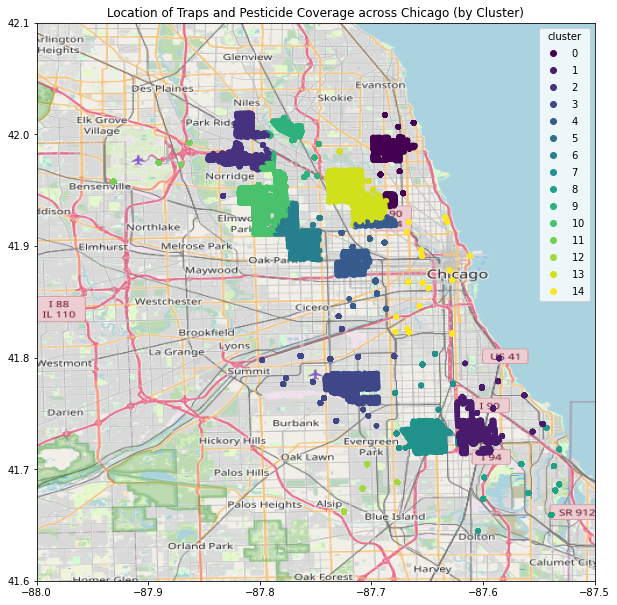

In [8]:
## Plot based on clusters
plt.figure(figsize = (10,15))

# Plot coordinates of all the traps and spraying locations
scatter_plot= plt.scatter(data = merged,
            x='long',
            y='lat',
            zorder=1,
            c=merged['cluster'],
            s=20)
map_ca = plt.imread('../images/chicago_map.png')
BBox = (-88.0, -87.5, 41.6, 42.1)

plt.title('Location of Traps and Pesticide Coverage across Chicago (by Cluster)')
plt.xlim(BBox[0],BBox[1])
plt.ylim(BBox[2],BBox[3])
plt.legend(*scatter_plot.legend_elements(num=15), loc="upper right", title="cluster")

plt.imshow(map_ca, zorder=0, extent = BBox, aspect= 'equal');

Since spraying was only done in 2011 and 2013, only data from these two years would be selected.

In [9]:
# Filter 2011 and 2013 dataset
merged = merged.set_index('date').sort_index()
spray_2011 = merged.loc['2011']
spray_2013 = merged.loc['2013']

### 2011 Spraying Visualisation by Cluster

In [10]:
# Find sprayed clusters in 2011 dataset
sprayed_clusters_2011 = spray_2011.loc[spray_2011['type']=='spray','cluster'].unique().tolist()
sprayed_clusters_2011

[5, 2, 10, 9]

In [11]:
# Filter 2011 data for sprayed clusters
spray_2011 = spray_2011.loc[spray_2011['cluster'].isin(sprayed_clusters_2011),['type','nummosquitos','cluster']]
print(spray_2011.shape)
spray_2011.head()

(1385, 3)


,type,nummosquitos,cluster
date,,,
2011-06-10,trap,2.0,2
2011-06-10,trap,1.0,10
2011-06-10,trap,3.0,9
2011-06-10,trap,2.0,10
2011-06-10,trap,3.0,10


In [12]:
# Sum up the mosquito counts by cluster
mosquito_count_2011 = spray_2011.groupby(['cluster','type','date'])['nummosquitos'].sum().reset_index()
mosquito_count_2011.loc[mosquito_count_2011['type']=='spray','nummosquitos'] = mosquito_count_2011.loc[mosquito_count_2011['type']=='spray','nummosquitos'].replace(0,np.nan)
mosquito_count_2011.head()

,cluster,type,date,nummosquitos
0,2,spray,2011-09-07,NaN
1,2,trap,2011-06-10,2.0
2,2,trap,2011-06-17,35.0
3,2,trap,2011-06-24,18.0
4,2,trap,2011-06-30,73.0


In [13]:
# Number of times sprayed in each cluster
mosquito_count_2011[mosquito_count_2011['type']=='spray'].groupby('cluster').size()

cluster
2     1
5     1
9     1
10    1
dtype: int64

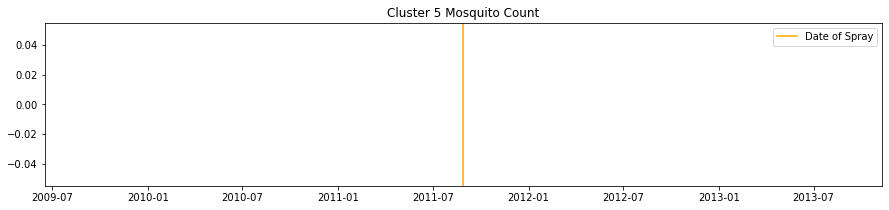

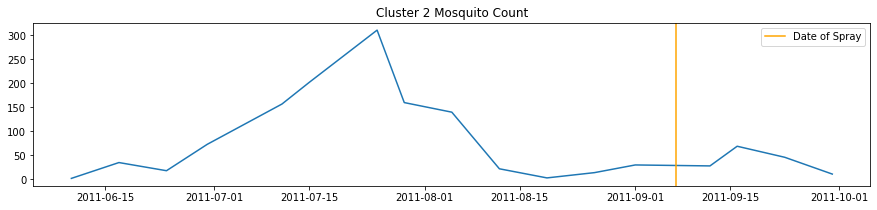

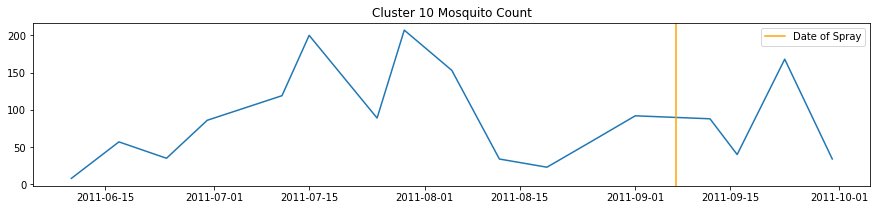

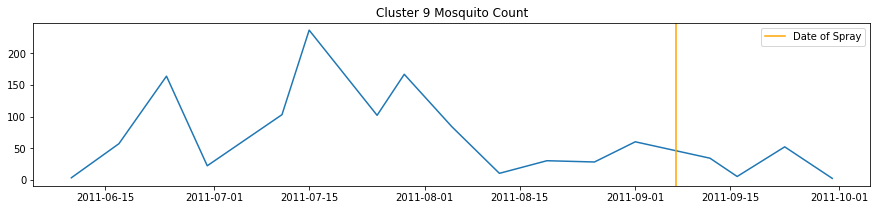

In [14]:
for cluster in sprayed_clusters_2011:
    
    cluster_data = mosquito_count_2011[mosquito_count_2011['cluster']== cluster].set_index('date')
    plt.figure(figsize=(15,3))
    plt.plot(cluster_data.loc[cluster_data['type'] == 'trap','nummosquitos'])
    plt.axvline(x = cluster_data[cluster_data['type'] == 'spray'].index[0],color = 'orange',label='Date of Spray')
    plt.title(f'Cluster {cluster} Mosquito Count')
    plt.legend();

#### Summary of Findings
- Only 4 clusters out of 15 clusters were sprayed in 2011, and mosquito count were not tracked in cluster 5.
- The interventions may have come in too late when the peak of mosquito breeding has passed.
- It seems the spraying was not effective, as the count of mosquito spiked up again after spraying and the reduction in number of mosquito afterwards were small

### 2013 Spraying Visualisation by Cluster

In [15]:
# Find sprayed clusters in 2013 dataset
sprayed_clusters_2013 = spray_2013.loc[spray_2013['type']=='spray','cluster'].unique().tolist()
sprayed_clusters_2013

[7, 9, 11, 13, 0, 4, 6, 10, 1, 3, 2]

In [16]:
# Filter 2013 data for sprayed clusters
spray_2013 = spray_2013.loc[spray_2013['cluster'].isin(sprayed_clusters_2013),['type','nummosquitos','cluster']]
print(spray_2013.shape)
spray_2013.head()

(14518, 3)


,type,nummosquitos,cluster
date,,,
2013-06-07,trap,4.0,11
2013-06-07,trap,4.0,11
2013-06-07,trap,3.0,11
2013-06-07,trap,2.0,11
2013-06-07,trap,17.0,11


In [17]:
mosquito_count_2013 = spray_2013.groupby(['cluster','type','date'])['nummosquitos'].sum().reset_index()
mosquito_count_2013.loc[mosquito_count_2013['type']=='spray','nummosquitos'] = mosquito_count_2013.loc[mosquito_count_2013['type']=='spray','nummosquitos'].replace(0,np.nan)
mosquito_count_2013.head()

,cluster,type,date,nummosquitos
0,0,spray,2013-08-08,NaN
1,0,spray,2013-08-29,NaN
2,0,trap,2013-06-07,9.0
3,0,trap,2013-06-14,53.0
4,0,trap,2013-06-21,19.0


In [18]:
# Number of times sprayed in each cluster
mosquito_count_2013[mosquito_count_2013['type']=='spray'].groupby('cluster').size()

cluster
0     2
1     1
2     1
3     1
4     2
6     2
7     2
9     2
10    2
11    1
13    2
dtype: int64

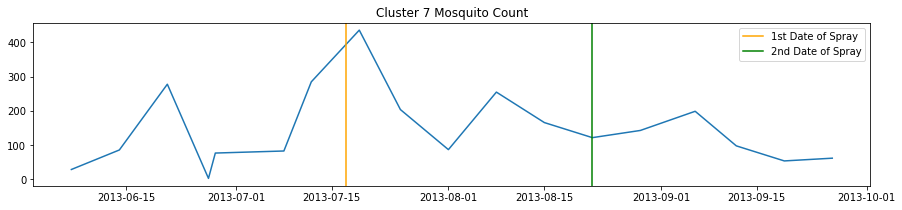

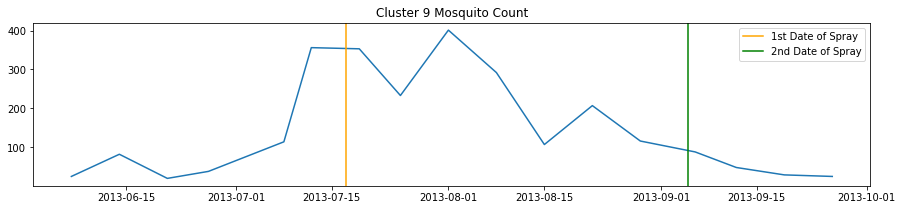

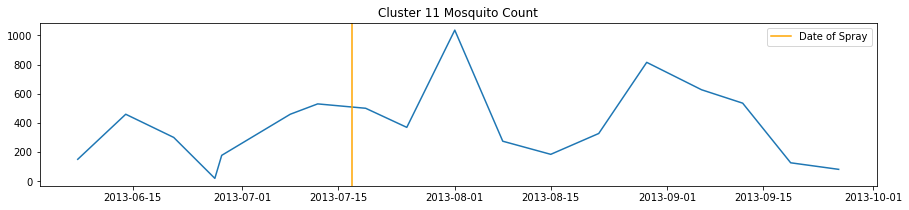

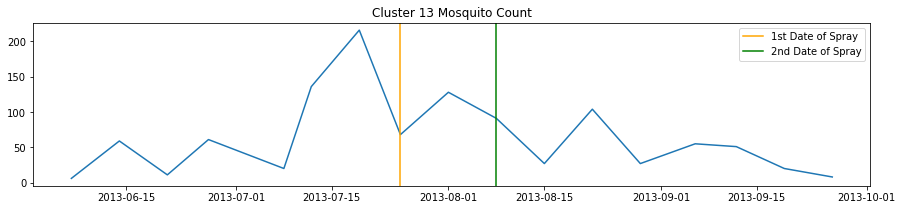

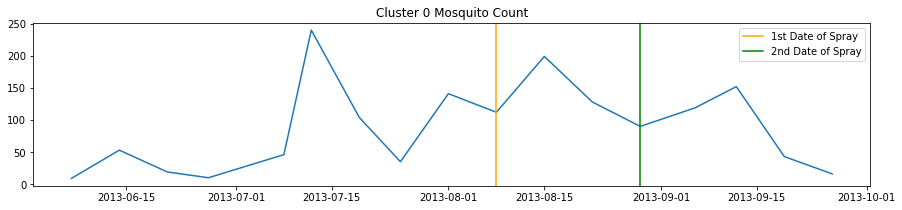

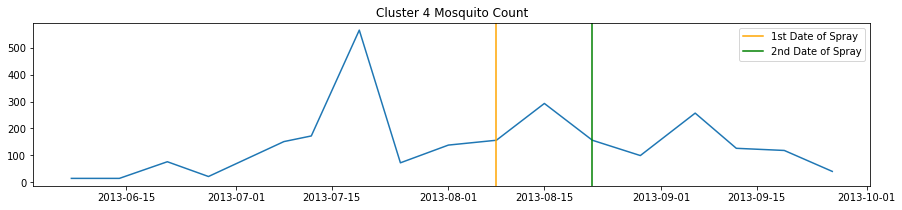

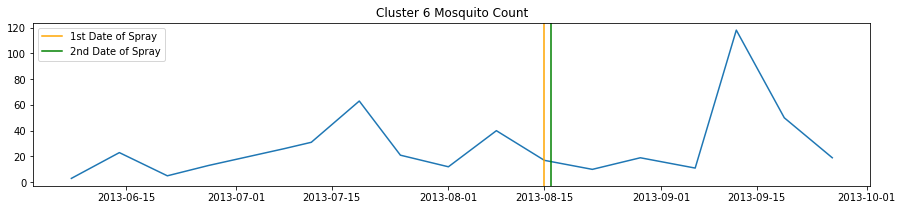

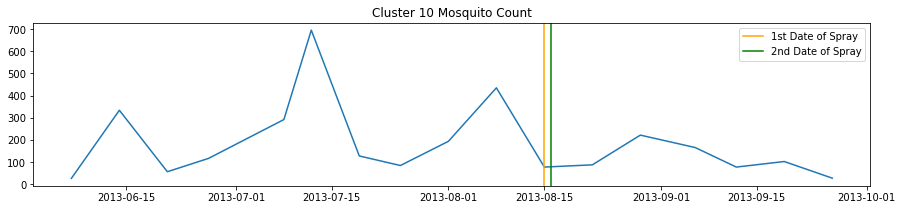

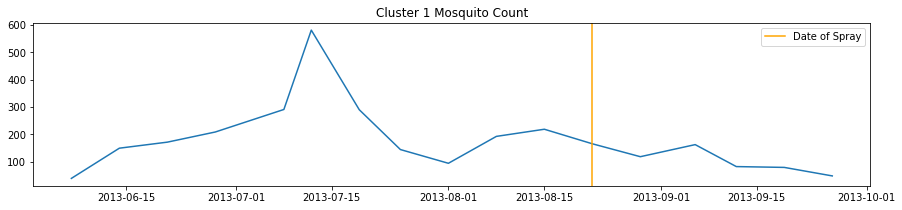

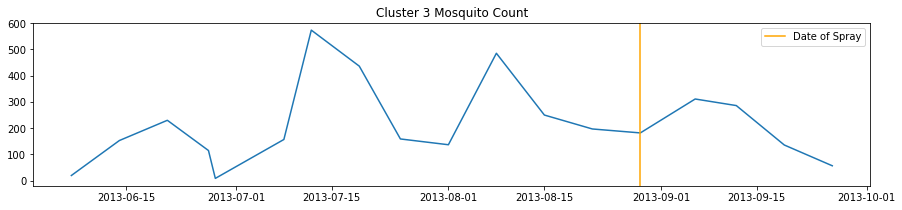

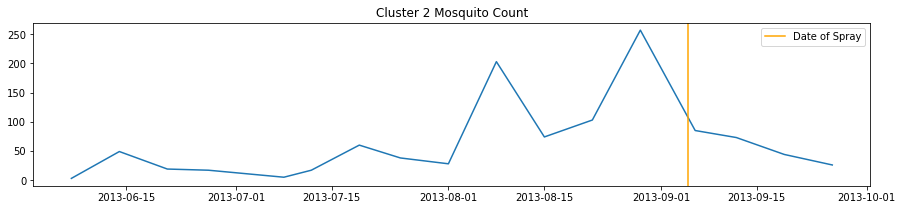

In [19]:
for cluster in sprayed_clusters_2013:
    
    cluster_data = mosquito_count_2013[mosquito_count_2013['cluster']== cluster].set_index('date')
    plt.figure(figsize=(15,3))
    plt.plot(cluster_data.loc[cluster_data['type'] == 'trap','nummosquitos'])
    plt.title(f'Cluster {cluster} Mosquito Count')
    
    # Number of vertical lines are based on number of times sprayed in each cluster
    spraying_dates = cluster_data[cluster_data['type'] == 'spray'].index
    
    if len(spraying_dates)==1:
        plt.axvline(x = spraying_dates[0],color = 'orange',label='Date of Spray')
    
    if len(spraying_dates)==2:
        plt.axvline(x = spraying_dates[0],color = 'orange',label='1st Date of Spray')
        plt.axvline(x = spraying_dates[1],color = 'green',label='2nd Date of Spray')

    plt.legend();

#### Summary of Findings
- Compared to 2011, the following differences were observed:
    - Pesticide coverage increased from 3 clusters to 11 clusters.
    - Frequency of spraying was also increased to 2 times for some clusters.
    - Spraying was more in time compared to 2011 for some of the clusters. It was done around or even before the peak period of mosquito breeding (e.g. cluster 7,9,11).
- Overall, spraying was effective in reducing the number of mosquito across most of the clusters. 
- In some occasions, mosquito counts spiked up again after spraying but subside subsequently.

## Quantifying Benefits of Spraying (by Cluster)

- Cost savings for spraying were estimated using the following formula:

    Total Cost Savings = Number of reduced positive human cases  **x**  Cost-savings of each positive human case

- Each positive human cases will incur $39000 cost on average, including medical costs and indirect costs from lost productivity ([source](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3291438/))


- Number of reduced positive human cases were estimated from number of mosquito reduced, based on official statistics ([source](https://www.nsmad.org/about_mosquitoes_/west_nile_virus.php)), using the following formula:

   number of mosquito reduced **x** percentage of mosquito with virus **x** mosquito to human positive cases ratio

In [20]:
# An empty list to store all spraying results
all_spraying_result = list()

In [21]:
# Iterate through each cluster to find number of mosquito before and after spraying

for cluster in sprayed_clusters_2013:
    
    # Filter out the trap data for the cluster
    cluster_data = mosquito_count_2013[mosquito_count_2013['cluster']== cluster].set_index('date').sort_index()
    cluster_trap_data = cluster_data[cluster_data['type']=='trap']
    
    # Date of spraying and the date that pesticide can last until
    spraying_date = cluster_data.loc[cluster_data['type']== 'spray'].index[0]
    effect_until = spraying_date + datetime.timedelta(days=30)
    
    # Number of mosquito before spraying
    before_date = cluster_trap_data.truncate(after=spraying_date).tail(1).index[0]
    mosquito_before_spray = cluster_trap_data.loc[before_date,'nummosquitos']
    
    # Number of mosquito after spraying
    after_date = cluster_trap_data.loc[spraying_date:effect_until].sort_values(by='nummosquitos').head(1).index[0]
    mosquito_after_spray = cluster_trap_data.loc[after_date,'nummosquitos']
    
    # Store result in a dictionary
    cluster_spraying_result = {'year':2013,
                           'cluster':cluster,
                           'spraying_date':spraying_date,
                           'before_date': before_date,
                           'mosquito_before_spray': mosquito_before_spray,
                           'after_date':after_date,
                           'mosquito_after_spray': mosquito_after_spray,
                          }
    
    all_spraying_result.append(cluster_spraying_result)

In [22]:
# Repeat the same steps for 2011 data

for cluster in [2,9,10]:
    
    # Filter out the trap data for the cluster
    cluster_data = mosquito_count_2011[mosquito_count_2011['cluster']== cluster].set_index('date').sort_index()
    cluster_trap_data = cluster_data[cluster_data['type']=='trap']
    
    # Date of spraying and the date that pesticide can last until
    spraying_date = cluster_data.loc[cluster_data['type']== 'spray'].index[0]
    effect_until = spraying_date + datetime.timedelta(days=30)
    
    # Number of mosquito before spraying
    before_date = cluster_trap_data.truncate(after=spraying_date).tail(1).index[0]
    mosquito_before_spray = cluster_trap_data.loc[before_date,'nummosquitos']
    
    # Number of mosquito after spraying
    after_date = cluster_trap_data.loc[spraying_date:effect_until].sort_values(by='nummosquitos').head(1).index[0]
    mosquito_after_spray = cluster_trap_data.loc[after_date,'nummosquitos']
    
    # Store result in a dictionary
    cluster_spraying_result = {'year':2011,
                           'cluster':cluster,
                           'spraying_date':spraying_date,
                           'before_date': before_date,
                           'mosquito_before_spray': mosquito_before_spray,
                           'after_date':after_date,
                           'mosquito_after_spray': mosquito_after_spray,
                          }
    
    all_spraying_result.append(cluster_spraying_result)

In [23]:
# Overview of spraying results in 2011 and 2013
all_spraying_result_df = pd.DataFrame(all_spraying_result)
all_spraying_result_df.head()

,year,cluster,spraying_date,before_date,mosquito_before_spray,after_date,mosquito_after_spray
0,2013,7,2013-07-17,2013-07-12,285.0,2013-08-01,87.0
1,2013,9,2013-07-17,2013-07-12,356.0,2013-08-15,107.0
2,2013,11,2013-07-17,2013-07-12,530.0,2013-08-15,184.0
3,2013,13,2013-07-25,2013-07-25,68.0,2013-08-15,27.0
4,2013,0,2013-08-08,2013-08-08,112.0,2013-08-29,90.0


In [24]:
# Calculate number of mosquito reduced
all_spraying_result_df['num_reduced'] = all_spraying_result_df['mosquito_before_spray']-all_spraying_result_df['mosquito_after_spray']

# Estimate number of mosquito with virus reduced through spraying
def estimate_mosquito_with_virus(row):
    if row['year']==2013:
        row['mosquito_with_virus'] = 0.21*row['num_reduced']
    if row['year']==2011:
        row['mosquito_with_virus'] = 0.13*row['num_reduced']
    return row['mosquito_with_virus']

all_spraying_result_df['mosquito_with_virus_reduced'] = all_spraying_result_df.apply(estimate_mosquito_with_virus,axis=1)

# Estimate number of positive human cases reduced through spraying
def estimate_human_cases(row):
    if row['year']==2013:
        row['human_case_reduced'] = row['mosquito_with_virus_reduced']/67
    if row['year']==2011:
        row['human_case_reduced'] = row['mosquito_with_virus_reduced']/50
    return row['human_case_reduced']

all_spraying_result_df['human_cases_reduced'] = all_spraying_result_df.apply(estimate_human_cases,axis=1)

# Estimate cost-savings
all_spraying_result_df['cost_savings'] = all_spraying_result_df['human_cases_reduced']*39000
all_spraying_result_df.head()

,year,cluster,spraying_date,before_date,mosquito_before_spray,after_date,mosquito_after_spray,num_reduced,mosquito_with_virus_reduced,human_cases_reduced,cost_savings
0,2013,7,2013-07-17,2013-07-12,285.0,2013-08-01,87.0,198.0,41.58,0.620597,24203.283582
1,2013,9,2013-07-17,2013-07-12,356.0,2013-08-15,107.0,249.0,52.29,0.780448,30437.462687
2,2013,11,2013-07-17,2013-07-12,530.0,2013-08-15,184.0,346.0,72.66,1.084478,42294.626866
3,2013,13,2013-07-25,2013-07-25,68.0,2013-08-15,27.0,41.0,8.61,0.128507,5011.791045
4,2013,0,2013-08-08,2013-08-08,112.0,2013-08-29,90.0,22.0,4.62,0.068955,2689.253731


In [25]:
# Sum of reduction in cases and cost savings (by year)
all_spraying_result_df.groupby('year')[['num_reduced','mosquito_with_virus_reduced','human_cases_reduced','cost_savings']].sum()

,num_reduced,mosquito_with_virus_reduced,human_cases_reduced,cost_savings
year,,,,
2011,135.0,17.55,0.351000,13689.000000
2013,1362.0,286.02,4.268955,166489.253731


In [26]:
# Average reduction in cases and cost savings in each cluster (by year)
all_spraying_result_df.groupby('year')[['num_reduced','mosquito_with_virus_reduced','human_cases_reduced','cost_savings']].mean()

,num_reduced,mosquito_with_virus_reduced,human_cases_reduced,cost_savings
year,,,,
2011,45.000000,5.850000,0.117000,4563.000000
2013,123.818182,26.001818,0.388087,15135.386703


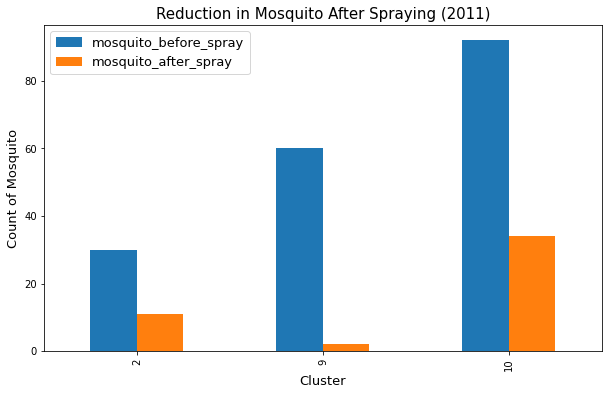

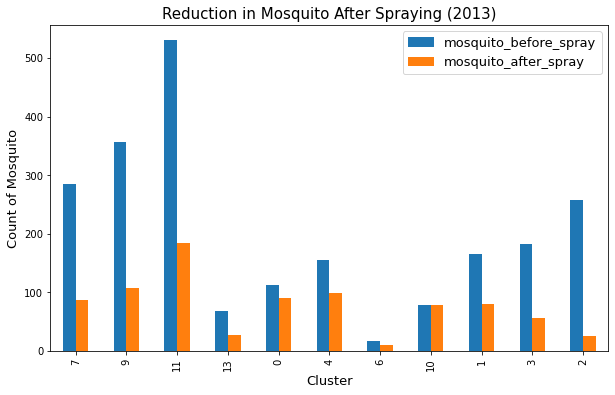

In [27]:
# Visualising reduction in mosquito through spraying
result_2013 = all_spraying_result_df[all_spraying_result_df['year']==2013]
result_2011 = all_spraying_result_df[all_spraying_result_df['year']==2011]

result_2011.plot(x='cluster',y=['mosquito_before_spray','mosquito_after_spray'],kind='bar', figsize = (10,6))
plt.title ('Reduction in Mosquito After Spraying (2011)', fontsize=15)
plt.xlabel('Cluster',fontsize=13)
plt.ylabel('Count of Mosquito', fontsize=13)
plt.legend(fontsize=13)


result_2013.plot(x='cluster',y=['mosquito_before_spray','mosquito_after_spray'],kind='bar', figsize = (10,6));
plt.title ('Reduction in Mosquito After Spraying (2013)', fontsize=15)
plt.xlabel('Cluster',fontsize=13)
plt.ylabel('Count of Mosquito', fontsize=13)
plt.legend(fontsize=13);

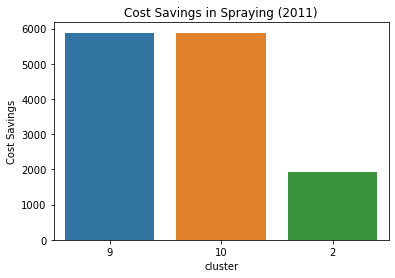

In [28]:
# Visualising cost savings by cluster - 2011
order_2011 = result_2011.sort_values(by='cost_savings',ascending=False)['cluster']
sns.barplot(data=result_2011,x='cluster',y='cost_savings',order=order_2011)
plt.title('Cost Savings in Spraying (2011)')
plt.ylabel('Cost Savings');

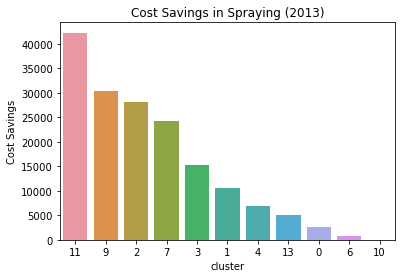

In [29]:
# Visualising cost savings by cluster - 2013
order_2013 = result_2013.sort_values(by='cost_savings',ascending=False)['cluster']
sns.barplot(data=result_2013,x='cluster',y='cost_savings',order=order_2013)
plt.title('Cost Savings in Spraying (2013)')
plt.ylabel('Cost Savings');

## Summary of Cost Benefit Analysis

**Overall Effectiveness of Spraying**
- Overall, spraying was effective in reducing the number of mosquito across most of the clusters. In some occasions, mosquito counts spiked up again after spraying but subside subsequently.
- Spraying was more effective in 2013 than 2011 because:
    - Increased pesticide coverage from 3 clusters to 11 clusters.
    - Frequency of spraying was also increased to 2 times for some clusters.
    - Spraying was more in time for some of the clusters. It was done around or even before the peak period of mosquito breeding.
- To maximise the benefit, the above factors should be considered.
- To avoid unnecessary expensiture on excessive spraying, insights from the prediction models can be used to do targeted spraying in areas that are predicted to have virus presence.

**Quantifying Benefits**
- Cost savings for spraying were estimated using the following formula:

    Total Cost Savings = Number of reduced positive human cases  **x**  Cost-savings of each positive human case

- Each positive human cases will incur $39000 cost on average, including medical costs and indirect costs from lost productivity ([source](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3291438/))


- Number of reduced positive human cases were estimated from number of mosquito reduced, based on official statistics ([source](https://www.nsmad.org/about_mosquitoes_/west_nile_virus.php)), using the following formula:

   number of mosquito reduced **x** percentage of mosquito with virus **x** mosquito to human positive cases ratio

| **Year** | **Mosquito Reduced** | **Mosquito with Virus Reduced** | **Human Cases Reduced** | **Cost Savings ($)** |
|:--------:|:--------------------:|:-------------------------------:|:-----------------------:|:--------------------:|
|   2011   |         135.0        |               17.6              |           0.35          |         13689        |
|   2013   |        1362.0        |              286.0              |           4.27          |        166489        |

